## Heading

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/properties.csv")
pd.set_option('display.max_columns', None) # Displays all the columns

In [3]:
df[["nbr_frontages", "fl_terrace", "equipped_kitchen"]].head()

,nbr_frontages,fl_terrace,equipped_kitchen
0,2.0,1,INSTALLED
1,NaN,0,MISSING
2,2.0,1,INSTALLED
3,NaN,0,MISSING
4,2.0,1,HYPER_EQUIPPED


In [4]:
df.shape

(75511, 30)

In [5]:
print(df.dtypes)

id                                  int64
price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                     float64
nbr_bedrooms                      float64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone                      

In [6]:

for locality in df.locality.unique():
    mean_lat = round(df[df['locality'] == locality].latitude.mean(), 6)
    mean_long = round(df[df['locality'] == locality].longitude.mean(), 6)

    #print(f'{locality}\n  mean latitude: {mean_lat}\n  mean longitude: {mean_long}')
    
    cond = df['locality'] == locality  # Condition
    df.loc[cond,'latitude'] = df.loc[cond,'latitude'].fillna(mean_lat)
    df.loc[cond,'longitude'] = df.loc[cond,'longitude'].fillna(mean_long)

In [7]:
df.region.value_counts()

region
Flanders            43424
Wallonia            24126
Brussels-Capital     7958
MISSING                 3
Name: count, dtype: int64

In [8]:
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [9]:
df.subproperty_type.value_counts()

subproperty_type
HOUSE                   29730
APARTMENT               28760
VILLA                    3276
GROUND_FLOOR             2169
APARTMENT_BLOCK          2043
MIXED_USE_BUILDING       1577
PENTHOUSE                1564
DUPLEX                   1497
FLAT_STUDIO              1135
EXCEPTIONAL_PROPERTY      599
TOWN_HOUSE                463
SERVICE_FLAT              459
MANSION                   453
BUNGALOW                  308
KOT                       293
LOFT                      270
FARMHOUSE                 218
COUNTRY_COTTAGE           213
MANOR_HOUSE               158
TRIPLEX                   109
OTHER_PROPERTY             85
CHALET                     83
CASTLE                     49
Name: count, dtype: int64

In [10]:
df = df.drop(df[df['subproperty_type'] == "CASTLE"].index)

In [11]:
df_house = df[df["property_type"] == "HOUSE"]
df_apartment = df[df["property_type"] == "APARTMENT"]

## Outliers

In [12]:
print(df.shape)
print(df.head())

for column in df.select_dtypes(include=["float64"]).columns:
    z = np.abs(zscore(df[column]))

    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = df[z > threshold]

    # Print the outliers
    print(f'{column}: {len(outliers)}')
    df = df.drop(outliers.index)

#numeric_cols = df.select_dtypes(include=["float64"]).columns
#df[numeric_cols].apply(zscore)
    
print(df.shape)
print(df.head())

(75462, 30)
         id     price property_type subproperty_type            region  \
0  34221000  225000.0     APARTMENT        APARTMENT          Flanders   
1   2104000  449000.0         HOUSE            HOUSE          Flanders   
2  34036000  335000.0     APARTMENT        APARTMENT  Brussels-Capital   
3  58496000  501000.0         HOUSE            HOUSE          Flanders   
4  48727000  982700.0     APARTMENT           DUPLEX          Wallonia   

          province  locality  zip_code   latitude  longitude  \
0          Antwerp   Antwerp      2050  51.217172   4.379982   
1    East Flanders      Gent      9185  51.174944   3.845248   
2         Brussels  Brussels      1070  50.842043   4.334543   
3          Antwerp  Turnhout      2275  51.238312   4.817192   
4  Walloon Brabant  Nivelles      1410  50.674643   4.507807   

   construction_year  total_area_sqm  surface_land_sqm  nbr_frontages  \
0             1963.0           100.0               NaN            2.0   
1           

In [13]:
df.subproperty_type.value_counts()

subproperty_type
HOUSE                   29310
APARTMENT               28438
VILLA                    2947
GROUND_FLOOR             2155
APARTMENT_BLOCK          1676
PENTHOUSE                1499
MIXED_USE_BUILDING       1465
DUPLEX                   1461
FLAT_STUDIO              1133
TOWN_HOUSE                461
SERVICE_FLAT              459
EXCEPTIONAL_PROPERTY      456
MANSION                   383
BUNGALOW                  308
KOT                       287
LOFT                      266
COUNTRY_COTTAGE           206
FARMHOUSE                 189
MANOR_HOUSE               136
TRIPLEX                   109
CHALET                     83
OTHER_PROPERTY             76
Name: count, dtype: int64

In [14]:
df_house.subproperty_type.value_counts()

subproperty_type
HOUSE                   29730
VILLA                    3276
APARTMENT_BLOCK          2043
MIXED_USE_BUILDING       1577
EXCEPTIONAL_PROPERTY      599
TOWN_HOUSE                463
MANSION                   453
BUNGALOW                  308
FARMHOUSE                 218
COUNTRY_COTTAGE           213
MANOR_HOUSE               158
OTHER_PROPERTY             85
CHALET                     83
Name: count, dtype: int64

In [15]:
print(df_house.shape)

for column in df_house.select_dtypes(include=["float64"]).columns:
    # Calculate the z-score for each student's height
    z = np.abs(zscore(df_house[column]))

    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = df_house[z > threshold]

    # Print the outliers
    print(f'{column}: {len(outliers)}')
    df_house = df_house.drop(outliers.index)

#numeric_cols = df.select_dtypes(include=["float64"]).columns
#df[numeric_cols].apply(zscore)
    
print(df_house.shape)

(39206, 30)
price: 578
latitude: 0
longitude: 0
construction_year: 0
total_area_sqm: 0
surface_land_sqm: 181
nbr_frontages: 0
nbr_bedrooms: 405
terrace_sqm: 0
garden_sqm: 0
primary_energy_consumption_sqm: 0
cadastral_income: 0
(38042, 30)


In [16]:
print(df_apartment.shape)

for column in df_house.select_dtypes(include=["float64"]).columns:
    # Calculate the z-score for each student's height
    z = np.abs(zscore(df_house[column]))

    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = df_house[z > threshold]

    # Print the outliers
    print(f'{column}: {len(outliers)}')
    df_house = df_house.drop(outliers.index)

#numeric_cols = df.select_dtypes(include=["float64"]).columns
#df[numeric_cols].apply(zscore)
    
print(df_house.shape)

(36256, 30)
price: 926
latitude: 337
longitude: 0
construction_year: 0
total_area_sqm: 0
surface_land_sqm: 599
nbr_frontages: 0
nbr_bedrooms: 614
terrace_sqm: 0
garden_sqm: 0
primary_energy_consumption_sqm: 0
cadastral_income: 0
(35566, 30)


In [17]:
df.size

2205090

In [18]:
df_cat = df.select_dtypes(include=["object"]).columns
df_cat

Index(['property_type', 'subproperty_type', 'region', 'province', 'locality',
       'equipped_kitchen', 'state_building', 'epc', 'heating_type'],
      dtype='object')

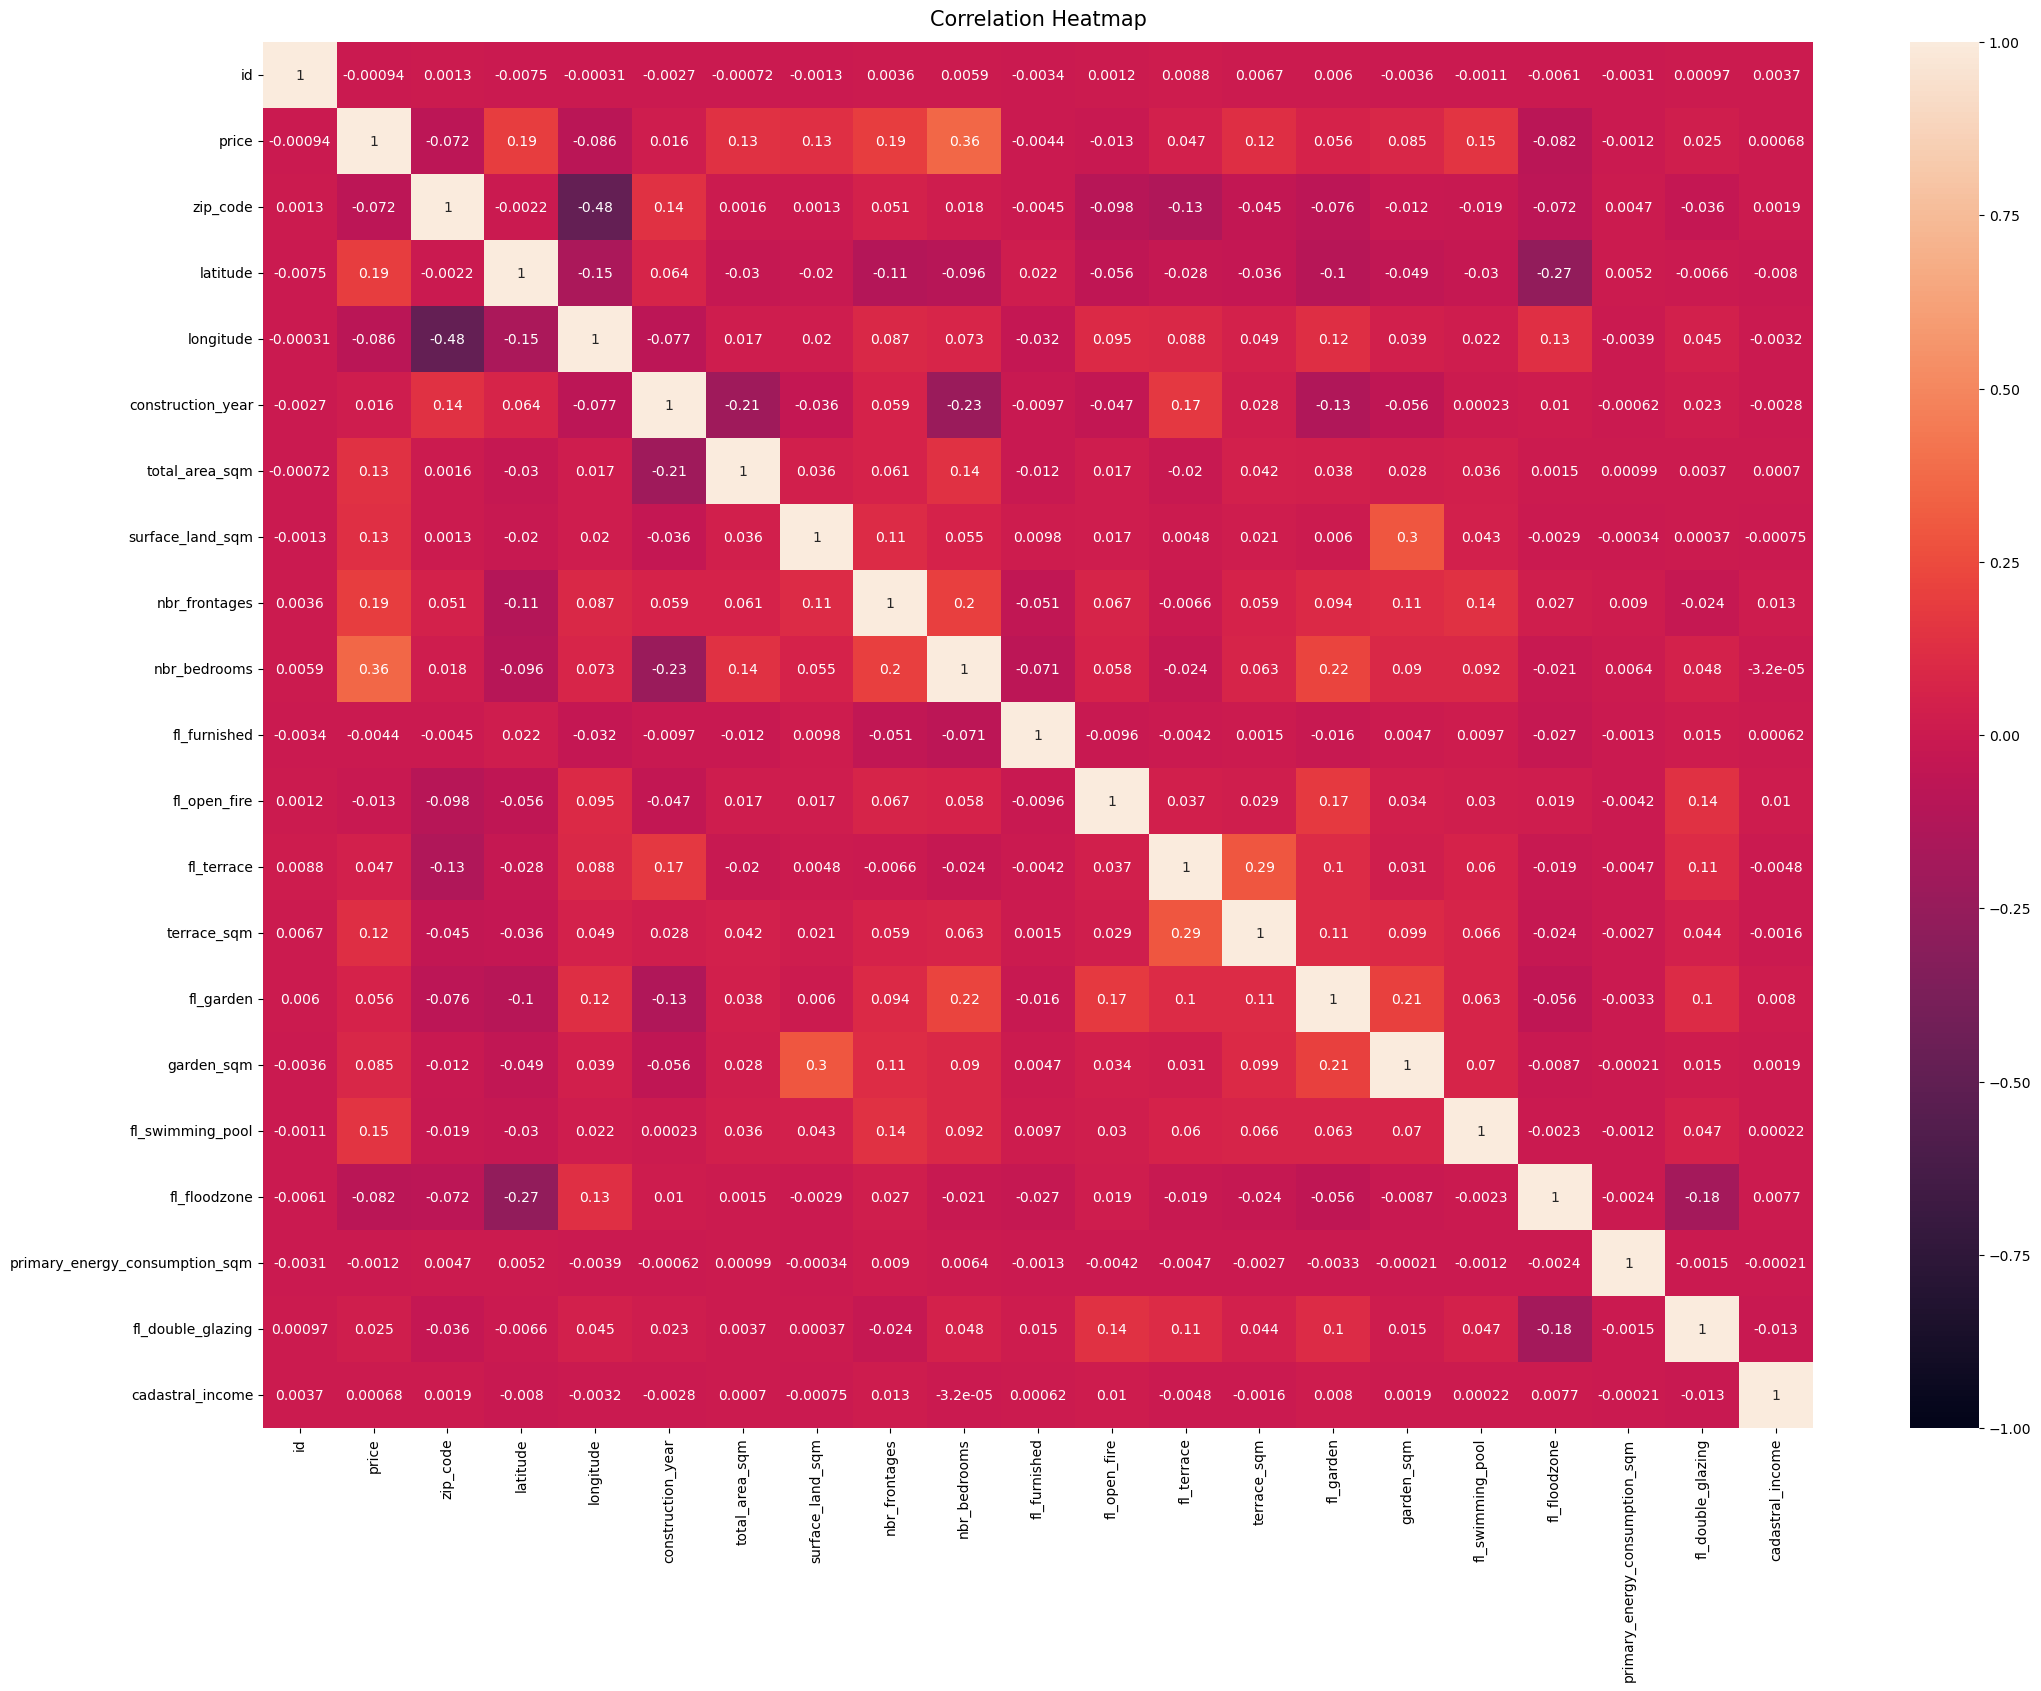

In [19]:
plt.figure(figsize=(25, 18))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

['Flanders', 'Brussels-Capital', 'Wallonia', 'MISSING']


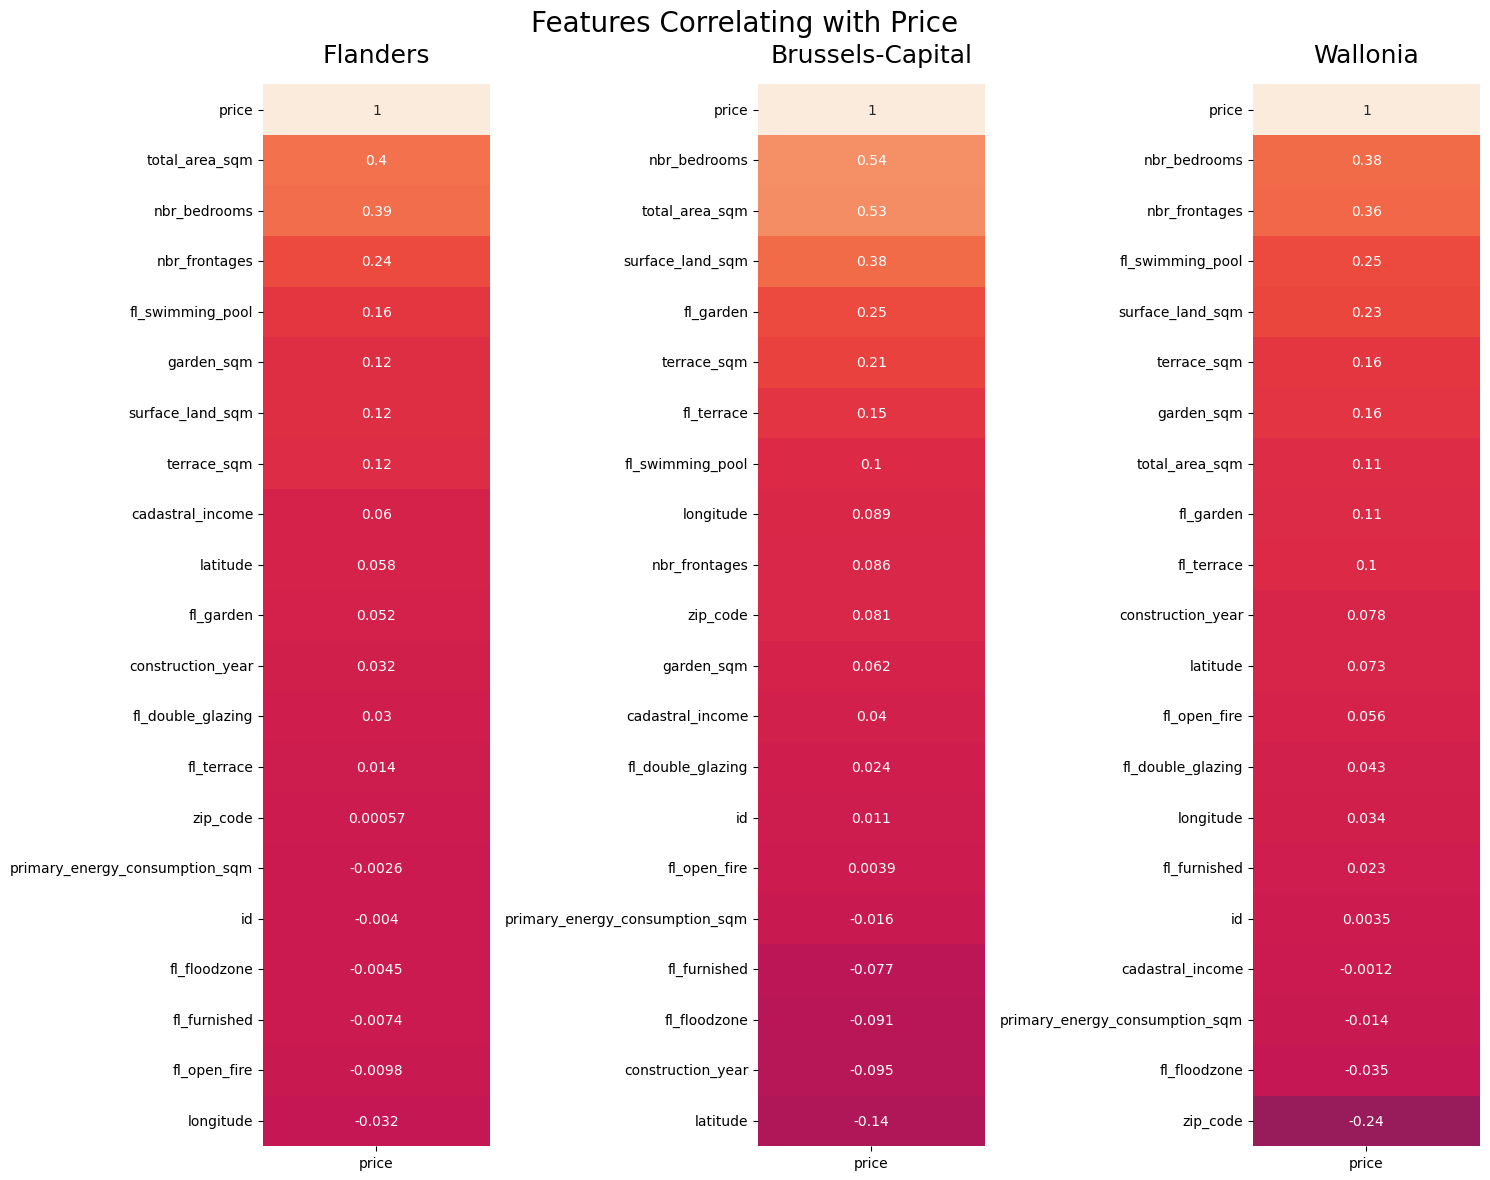

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 12))

fig.suptitle('Features Correlating with Price', fontsize=20)

#sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')

municipality = df.region.unique().tolist()
print(municipality)
municipality = [i for i in municipality[:3] if i is not None]

for i in range(len(municipality)):
    immo_region = df[df['region'] == municipality[i]]
    heatmap = sns.heatmap(immo_region.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), ax=axes[i], vmin=-1, vmax=1, annot=True, cbar=False)
    heatmap.set_title(f'{municipality[i]}', fontdict={'fontsize':18}, pad=16);
    
fig.tight_layout()

In [ ]:
CrosstabResult = pd.crosstab(index=df['equipped_kitchen'], columns=df['state_building'])
CrosstabResult

#ChiSqResult = chi2_contingency(CrosstabResult)
#print(f'P-value of the X2 is: {ChiSqResult}')

In [ ]:
print(df["province"].value_counts())
print(df["locality"].value_counts())
print(df[df["province"] == "MISSING"])

#df[df["latitude"].isnull()].locality.unique()

In [ ]:
df.locality.unique()

In [ ]:
df_Ieper = df_check[df_check['locality'] == "Roeselare"]
df_Ieper.tail()

In [ ]:
df_Ieper.latitude.isnull().value_counts()

In [ ]:
mean_lat = round(df_Ieper.latitude.mean(), 6)

In [ ]:
#df_Ieper["latitude"] = np.where(mean_lat, df_Ieper["latitude"], df_Ieper["latitude"])
#df_Ieper.loc[df_Ieper["latitude"].isnull() == True] = mean_lat
#df_Ieper.latitude.fillna(mean_lat)
df_Ieper[["latitude"]] = df_Ieper[["latitude"]].fillna(mean_lat)

df_Ieper.head()

In [ ]:
df_Ieper.latitude.isnull().value_counts()

In [ ]:
df_Ieper[df_Ieper['latitude'] == mean_lat]

In [ ]:
df_Ieper.head()